In [1]:
library(ggplot2)
library(gridExtra)
library(cowplot)
library(styler)


Warning message:
“package ‘ggplot2’ was built under R version 4.2.3”
Warning message:
“package ‘gridExtra’ was built under R version 4.2.3”
Warning message:
“package ‘cowplot’ was built under R version 4.2.3”
Warning message:
“package ‘styler’ was built under R version 4.2.3”


In [2]:
cell_type <- "PBMC"


In [3]:
# import paths 

nomic_data_path <- file.path("./results/nELISA_plate_430420_umap_PBMC.csv")
nomic_data_selected_treatments_path <- file.path("./results/nELISA_plate_430420_umap_PBMC_selected_treatments.csv")

figure_output_path <- file.path("./figures/")

# read data
nomic_data <- read.csv(nomic_data_path)
nomic_data_selected_treatments <- read.csv(nomic_data_selected_treatments_path)

head(nomic_data,2)
head(nomic_data_selected_treatments,2)


,plate_name,plate_barcode,position_x,cell_type,incubation.inducer,inhibitor,inhibitor_concentration_value,inhibitor_concentration_unit,inhibitor_concentration,inducer1,⋯,WISP.1..CCN4...NSU.,XCL1..Lymphotactin...NSU.,Treatment,Dose,oneb_Treatment_Dose_Inhibitor_Dose,twob_Treatment_Dose_Inhibitor_Dose,threeb_Treatment_Dose_Inhibitor_Dose,fourb_Treatment_Dose_Inhibitor_Dose,umap_1,umap_2
,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,⋯,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,70117_20230210MM1_P1,430420,B06,PBMC,6_h,DMSO,0.025,%,0.03,DMSO,⋯,0.5242758,0.2506705,DMSO,0.100_%,DMSO_0.100_%_DMSO_0.025_%,DMSO_DMSO_0.100_%,DMSO__0.100_%__DMSO_0.030,DMSO__0.100_%__DMSO__0.030,-3.847429,14.16169
2,70117_20230210MM1_P1,430420,C06,PBMC,6_h,DMSO,0.025,%,0.03,DMSO,⋯,0.4550923,0.2287523,DMSO,0.100_%,DMSO_0.100_%_DMSO_0.025_%,DMSO_DMSO_0.100_%,DMSO__0.100_%__DMSO_0.030,DMSO__0.100_%__DMSO__0.030,-3.159999,17.53089


,plate_name,plate_barcode,position_x,cell_type,incubation.inducer,inhibitor,inhibitor_concentration_value,inhibitor_concentration_unit,inhibitor_concentration,inducer1,⋯,WISP.1..CCN4...NSU.,XCL1..Lymphotactin...NSU.,Treatment,Dose,oneb_Treatment_Dose_Inhibitor_Dose,twob_Treatment_Dose_Inhibitor_Dose,threeb_Treatment_Dose_Inhibitor_Dose,fourb_Treatment_Dose_Inhibitor_Dose,umap_1,umap_2
,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,⋯,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,70117_20230210MM1_P1,430420,B06,PBMC,6_h,DMSO,0.025,%,0.03,DMSO,⋯,0.5242758,0.2506705,DMSO,0.100_%,DMSO_0.100_%_DMSO_0.025_%,DMSO_DMSO_0.100_%,DMSO__0.100_%__DMSO_0.030,DMSO__0.100_%__DMSO__0.030,4.229035,1.5016512
2,70117_20230210MM1_P1,430420,C06,PBMC,6_h,DMSO,0.025,%,0.03,DMSO,⋯,0.4550923,0.2287523,DMSO,0.100_%,DMSO_0.100_%_DMSO_0.025_%,DMSO_DMSO_0.100_%,DMSO__0.100_%__DMSO_0.030,DMSO__0.100_%__DMSO__0.030,4.752640,0.9404876


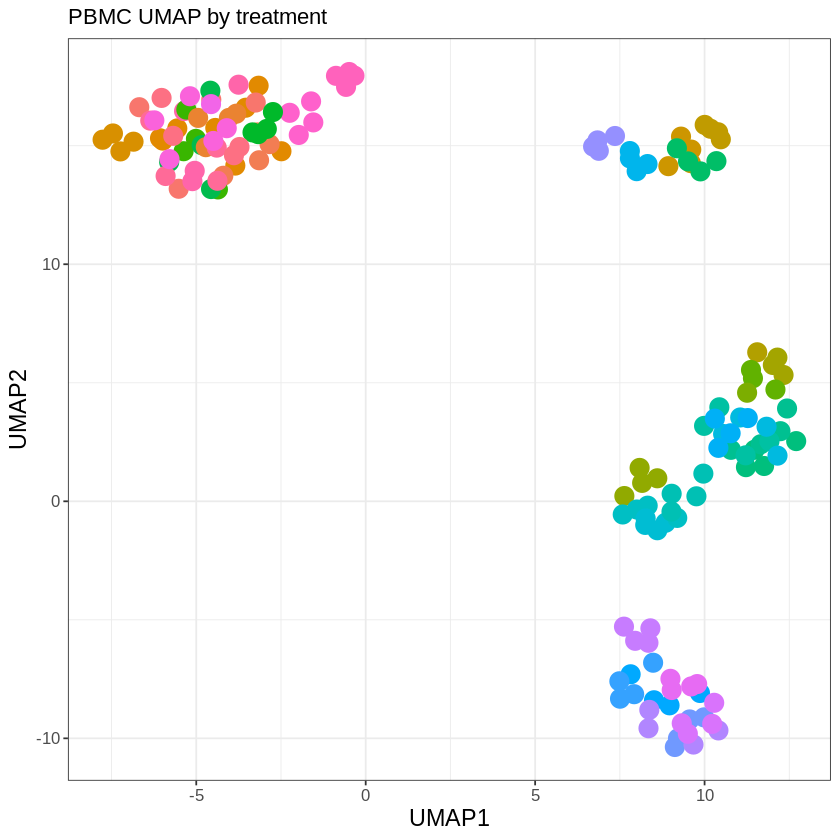

Saving 13.3 x 13.3 in image


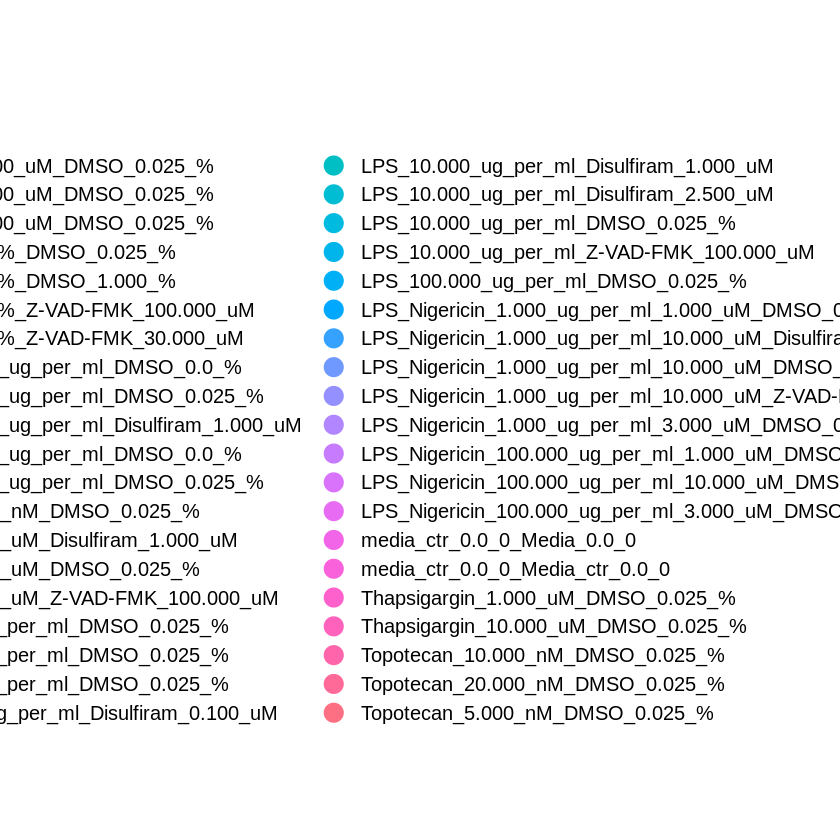

In [4]:
## plot the data
# set the plot size
nomic_data_plot <- (
    ggplot(nomic_data, aes(x = umap_1, y = umap_2, color = oneb_Treatment_Dose_Inhibitor_Dose)) 
    + geom_point(size = 5) 
    # detach the legend and plot it separately
    + theme_bw()
    + theme(
        legend.position = "right",
        axis.text = element_text(size = 10),
        axis.title = element_text(size = 14),
        legend.text = element_text(size = 12),
        legend.title = element_text(size = 16),
        strip.text = element_text(size = 8),
        strip.background = element_rect(
            colour = "black",
            fill = "#fdfff4"
            )
            )
    + guides(color = guide_legend(ncol = 2,title.position = 'top'))
    + labs(title = "PBMC UMAP by treatment",color="Treatment", x = "UMAP1", y = "UMAP2")
    # plot the legend separately
    

)
# extract the legend
legend <- get_legend(nomic_data_plot)

# remove the legend from the plot # will be saved separately
nomic_data_plot <- (
    nomic_data_plot
    + theme(legend.position = "none")
)
# show the plot + legend
legend <- plot_grid(legend)
nomic_data_plot
legend

# save the plot
# set the path
plot_path <- file.path(paste0(figure_output_path,"umap_by_all_treatment.png"))
plot_legend_path <- file.path(paste0(figure_output_path,"umap_by_all_treatment_legend.png"))
# save the plot
ggsave(plot_path, nomic_data_plot, width = 8.5, height = 5.5, dpi = 500)
ggsave(plot_legend_path, legend,dpi = 500, scale = 2)


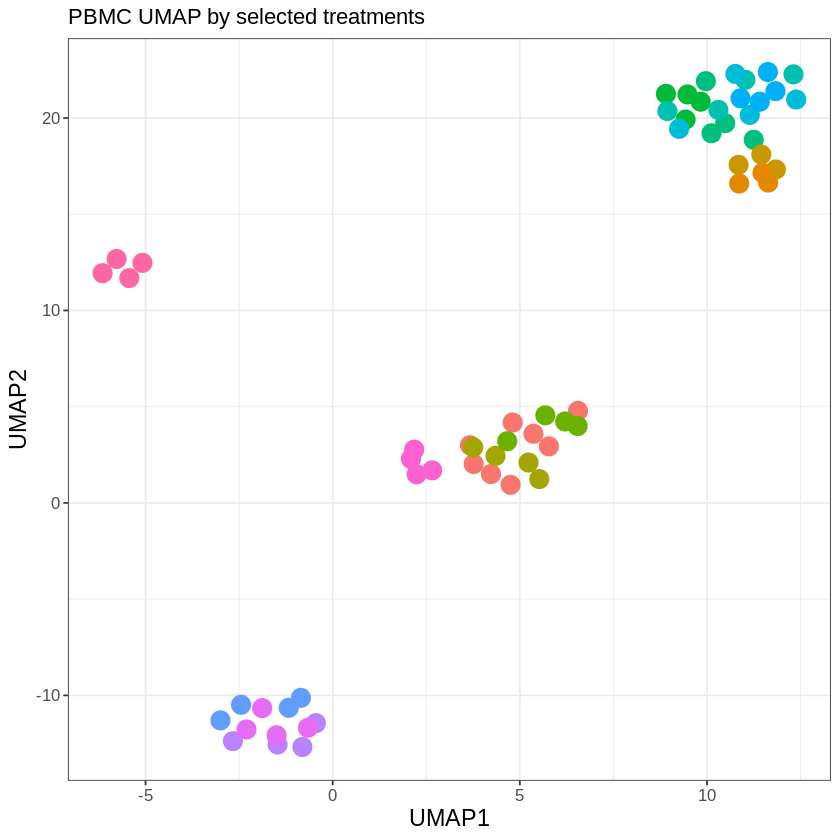

Saving 13.3 x 13.3 in image


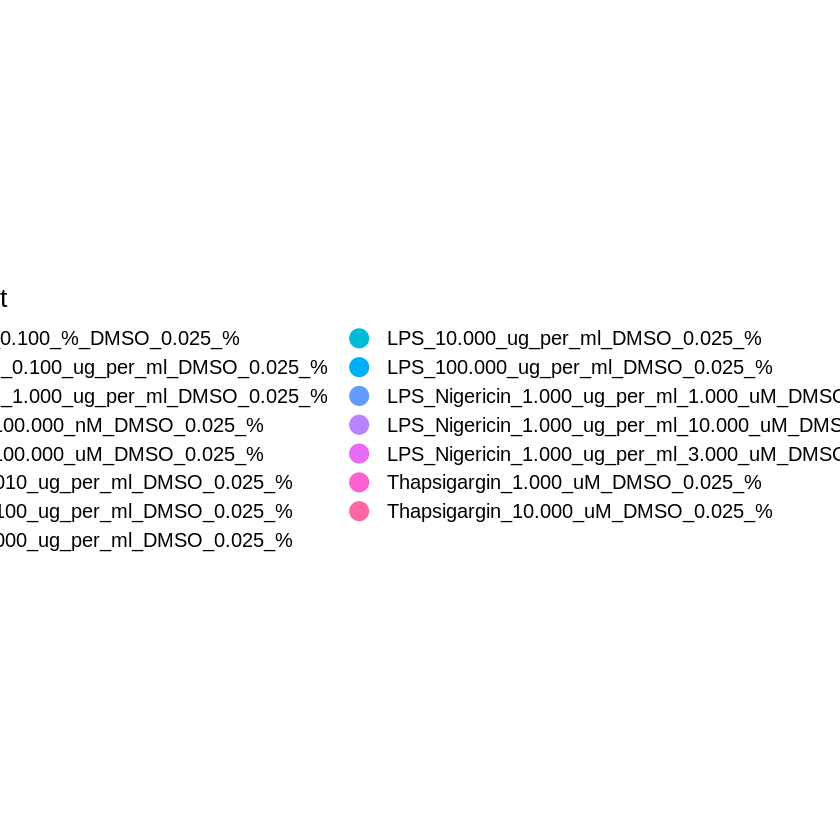

In [5]:
## plot the data
# set the plot size
nomic_data_selected_treatments_plot <- (
    ggplot(nomic_data_selected_treatments, aes(x = umap_1, y = umap_2, color = oneb_Treatment_Dose_Inhibitor_Dose)) 
    + geom_point(size = 5) 
    # detach the legend and plot it separately # save separately too
    + theme_bw()
    + theme(
        legend.position = "right",
        axis.text = element_text(size = 10),
        axis.title = element_text(size = 14),
        legend.text = element_text(size = 12),
        legend.title = element_text(size = 16),
        strip.text = element_text(size = 8),
        strip.background = element_rect(
            colour = "black",
            fill = "#fdfff4"
            )
            )
    + guides(color = guide_legend(ncol = 2,title.position = 'top'))
    + labs(title = "PBMC UMAP by selected treatments",color="Treatment", x = "UMAP1", y = "UMAP2")
    # plot the legend separately
    

)
# extract the legend
nomic_data_selected_treatments_plot_legend <- get_legend(nomic_data_selected_treatments_plot)

# remove the legend from the plot
nomic_data_selected_treatments_plot <- (
    nomic_data_selected_treatments_plot
    + theme(legend.position = "none")
)
# show the plot + legend
nomic_data_selected_treatments_plot_legend <- plot_grid(nomic_data_selected_treatments_plot_legend)
nomic_data_selected_treatments_plot
nomic_data_selected_treatments_plot_legend

# save the plot
# set the path
plot_path <- file.path(paste0(figure_output_path,"umap_by_selected_treatment.png"))
plot_legend_path <- file.path(paste0(figure_output_path,"umap_by_selected_treatment_legend.png"))
# save the plot
ggsave(plot_path, nomic_data_selected_treatments_plot, width = 8.5, height = 5.5, dpi = 500)
ggsave(plot_legend_path, nomic_data_selected_treatments_plot_legend, dpi = 500, scale = 2)
